In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [2]:
train_dataset = h5py.File('train_signs.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

In [3]:
test_dataset = h5py.File('test_signs.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

In [4]:
X_train=train_set_x_orig/255
X_test=test_set_x_orig/255
y_train=np.eye(6)[train_set_y_orig.reshape(-1)]
y_test=np.eye(6)[test_set_y_orig.reshape(-1)]

In [5]:
X_train.shape

(1080, 64, 64, 3)

In [6]:
y_train.shape

(1080, 6)

In [7]:
X_test.shape

(120, 64, 64, 3)

In [8]:
y_test.shape

(120, 6)

Text(0.5,1,'[0. 1. 0. 0. 0. 0.]')

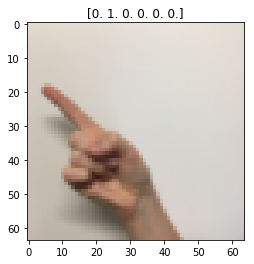

In [10]:
index=7
plt.imshow(X_train[index])
plt.title(y_train[index])

In [11]:
#import keras building block
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [18]:
# We will degine whole model in a function
def make_model():
    model=Sequential()
    model.add(Conv2D(16,(3,3),input_shape=[64,64,3], padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32,(3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(6))
    model.add(Activation("softmax"))
    
    return model
    

In [19]:
from keras import backend as K

In [20]:
K.clear_session()
model=make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
__________

In [26]:
# Train the model
INIT_LR=5e-3
Batch_size=64
num_epoch=10
K.clear_session()
model=make_model()
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.adamax(lr=INIT_LR),
             metrics=['accuracy'])

#def lr_scheduler(epoch):
 #   return INIT_LR*0.9**epoch
#class LrHistory(keras.callbacks.Callback):
#    def on_epoch_begin(self,epoch,logs={}):
 #       print("Learning rate: ", K.get_value(model.optimizer.lr))

model.fit(X_train,y_train, batch_size=Batch_size,epochs=num_epoch,
  #       callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), LrHistory()],
         validation_data=(X_test,y_test), shuffle=True)

Train on 1080 samples, validate on 120 samples
Epoch 1/10
1080/1080 [==============================] - 15s 14ms/step - loss: 2.4063 - acc: 0.1694 - val_loss: 1.7946 - val_acc: 0.1750
Epoch 2/10
1080/1080 [==============================] - 14s 13ms/step - loss: 1.7906 - acc: 0.1713 - val_loss: 1.7863 - val_acc: 0.1667
Epoch 3/10
1080/1080 [==============================] - 15s 13ms/step - loss: 1.7544 - acc: 0.2296 - val_loss: 1.6992 - val_acc: 0.4417
Epoch 4/10
1080/1080 [==============================] - 14s 13ms/step - loss: 1.5193 - acc: 0.3870 - val_loss: 1.2058 - val_acc: 0.6417
Epoch 5/10
1080/1080 [==============================] - 14s 13ms/step - loss: 1.1307 - acc: 0.5759 - val_loss: 0.9412 - val_acc: 0.6833
Epoch 6/10
1080/1080 [==============================] - 14s 13ms/step - loss: 0.9117 - acc: 0.6806 - val_loss: 0.7605 - val_acc: 0.7667
Epoch 7/10
1080/1080 [==============================] - 15s 14ms/step - loss: 0.8041 - acc: 0.7157 - val_loss: 0.6796 - val_acc: 0.8167
E

In [27]:
y_pred_test=model.predict_proba(X_test)
y_pred_test_classes=np.argmax(y_pred_test,axis=1)


In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_set_y_orig,y_pred_test_classes))

0.85


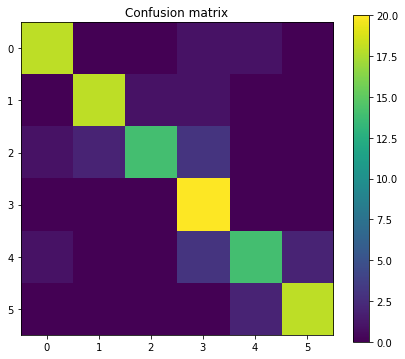

In [30]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7,6))
plt.title('Confusion matrix')
plt.imshow(confusion_matrix(test_set_y_orig, y_pred_test_classes))
plt.colorbar()
plt.show()

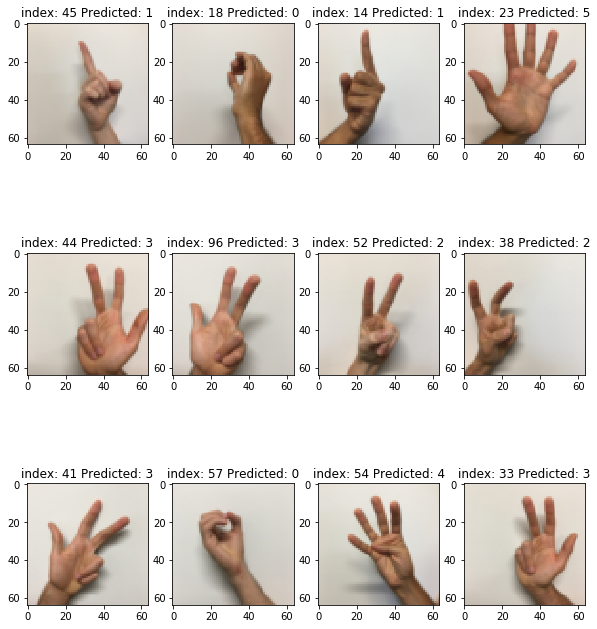

In [50]:
fig,subaxes=plt.subplots(3,4,figsize=(10,12))
index=list(np.random.permutation(range(1,100)))[1:13]
index=np.array(index).reshape(3,4)
for thisaxisrow,indexrow in zip(subaxes,index):
    for thisaxis, value in zip(thisaxisrow,indexrow):
        thisaxis.imshow(X_test[value])
        thisaxis.set_title('index: '+str(value)+ " Predicted: " +str(y_pred_test_classes[value]))